In [5]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pydub import AudioSegment
from pydub.silence import split_on_silence
from sklearn.decomposition import PCA


In [ ]:

# Set paths
main_folder_path = '/content/drive/MyDrive/b3'
cleaned_folder_path = 'b3_cleaned5'




In [ ]:

# Function to extract MFCC features from a file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs.mean(axis=1)

# (Include all other function definitions here: perform_clustering, save_results, etc.)




# Function to perform k-means clustering
def perform_clustering(features_list, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(np.vstack(features_list))
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    return labels, cluster_centers

# Function to save results in separate directories based on cluster labels
def save_results(labels, file_paths, output_directory):
    for label, file_path in zip(labels, file_paths):
        destination = os.path.join(output_directory, str(label))
        os.makedirs(destination, exist_ok=True)
        shutil.copy(file_path, destination)

# Function to plot the distribution of clusters
def plot_cluster_distribution(labels):
    sns.countplot(x=labels)
    plt.title('Cluster Distribution')
    plt.xlabel('Cluster Label')
    plt.ylabel('Count')
    plt.show()
def find_optimal_clusters(features_list, max_k):
    distortions = []
    K_range = range(1, max_k+1)
    for i in K_range:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(np.vstack(features_list))
        distortions.append(kmeans.inertia_)

    plt.figure()
    plt.plot(K_range, distortions, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()



# Function to visualize clusters using PCA
def visualize_clusters(features_list, labels, class_folder):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_list)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='Spectral', s=60)
    plt.title(f'PCA Cluster Visualization for Class: {class_folder}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# Function to analyze clusters and return average distances and silhouette score
def analyze_clusters(features_list, labels, cluster_centers):
    avg_distances = []
    for i, center in enumerate(cluster_centers):
        members = np.array(features_list)[labels == i]
        distances = np.linalg.norm(members - center, axis=1)
        avg_distances.append(distances.mean())
    sil_score = silhouette_score(np.array(features_list), labels)
    return avg_distances, sil_score



/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1632
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1697
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1742
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py

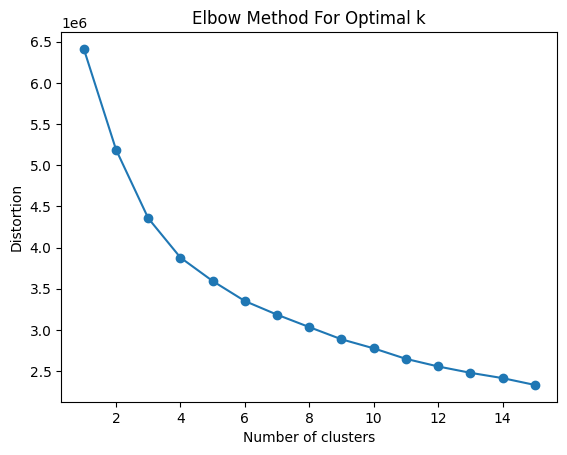

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Caligavis Chrysops
Average distances to cluster centers: [42.774956, 52.032074, 56.764885, 53.820335, 66.72704, 51.452244, 46.90253, 46.879814, 58.073994, 51.119114, 36.08807, 12.970492, 44.88109, 60.592785, 50.40029]
Silhouette score: 0.18377423286437988


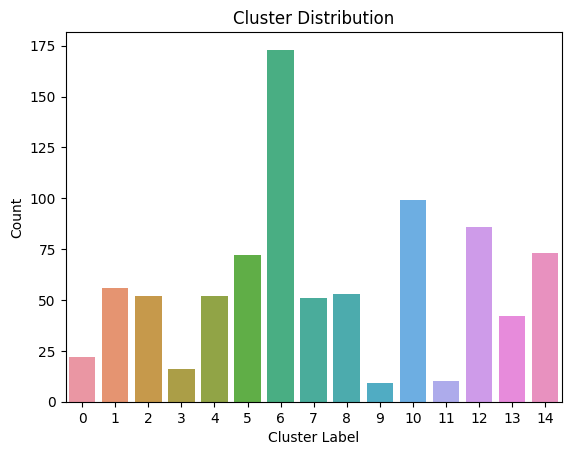

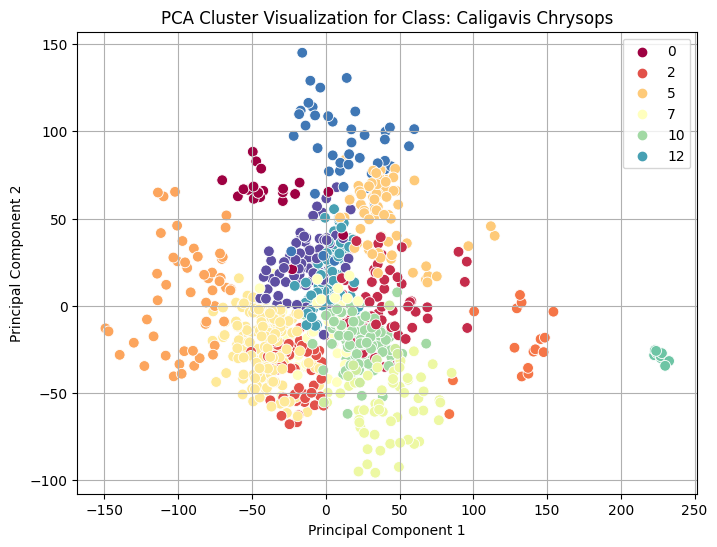

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1897
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

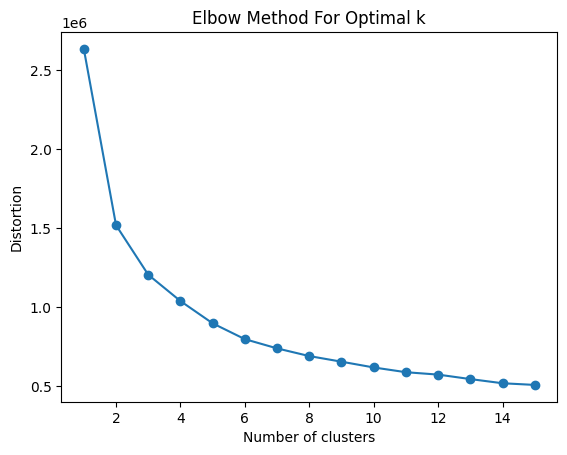

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Capra Hircus
Average distances to cluster centers: [22.015606, 26.55264, 41.043438, 39.83895, 47.690956, 37.569607, 48.085754, 37.260914, 28.732126, 34.073338, 43.137688, 25.336351, 26.65963, 30.497597, 53.807804]
Silhouette score: 0.24843783676624298


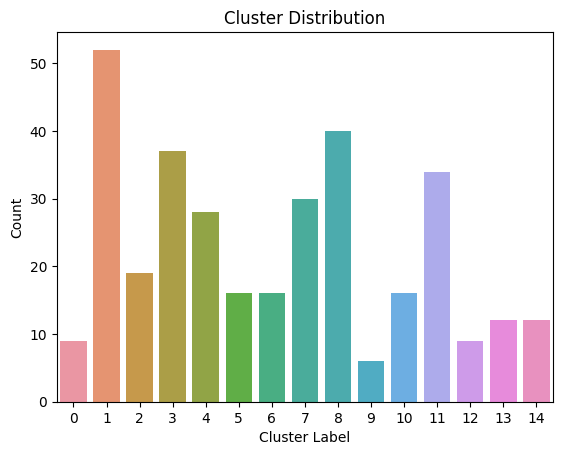

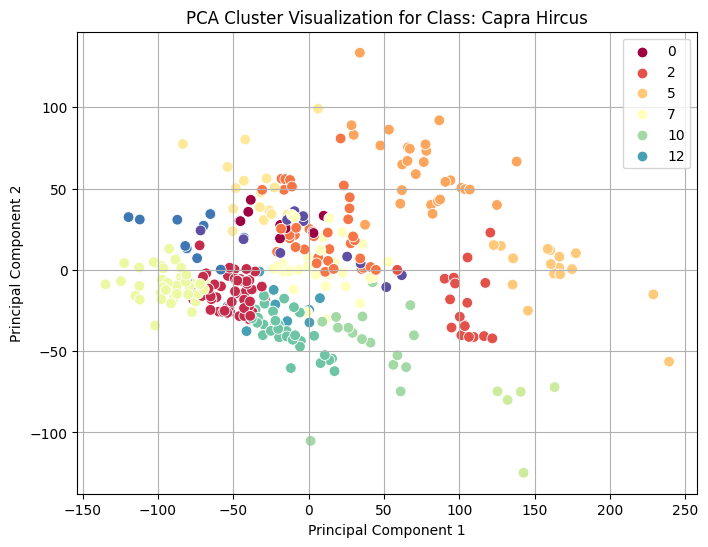

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1985
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

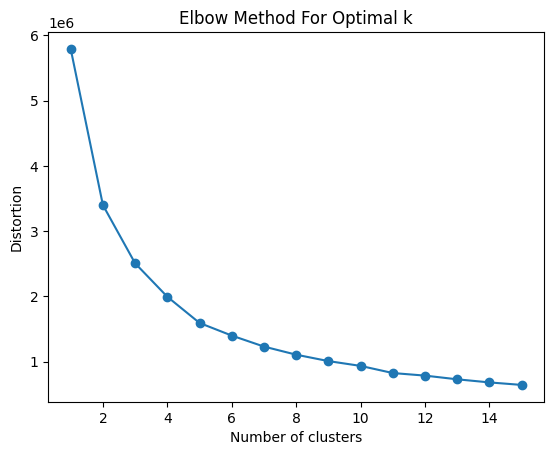

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Alauda Arvensis
Average distances to cluster centers: [24.624004, 37.957672, 38.29167, 39.69235, 29.72745, 34.608418, 44.252075, 28.897076, 41.035976, 29.50071, 27.381386, 16.585201, 40.35425, 33.732647, 32.64997]
Silhouette score: 0.3373532295227051


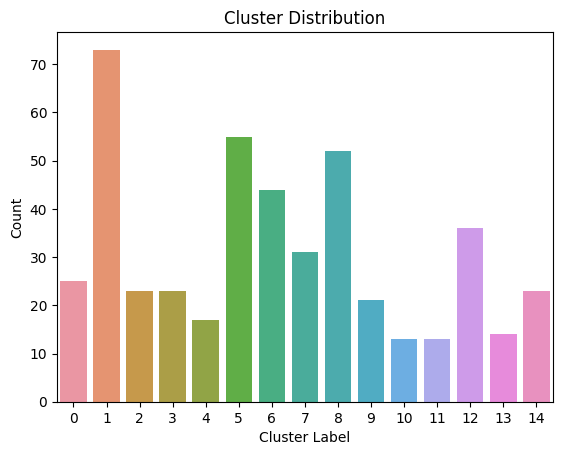

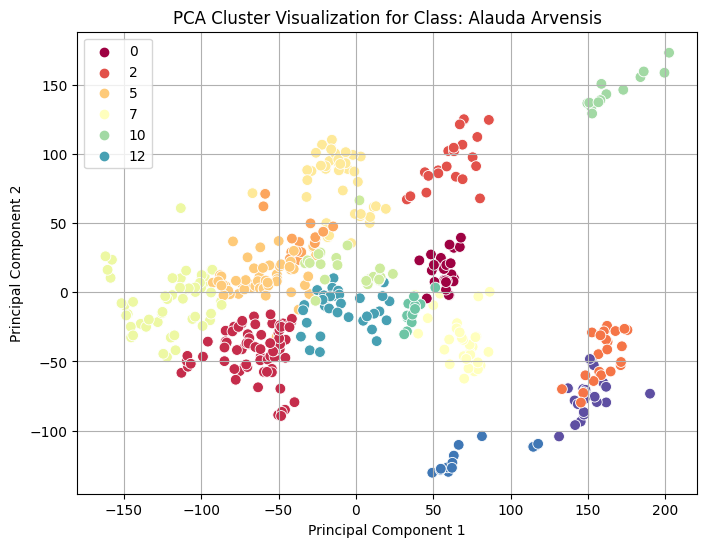

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1764
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1235
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warn

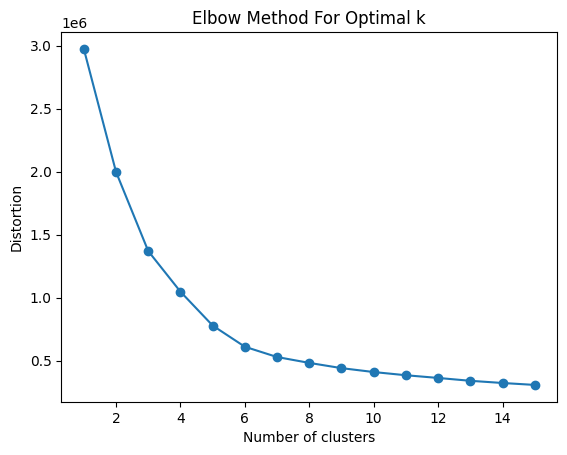

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Dama Dama
Average distances to cluster centers: [38.01041, 29.913214, 32.669006, 26.106125, 38.753807, 31.675098, 26.777218, 23.86666, 32.490707, 19.536558, 35.63654, 27.762, 17.70804, 30.615124, 22.517588]
Silhouette score: 0.3365229070186615


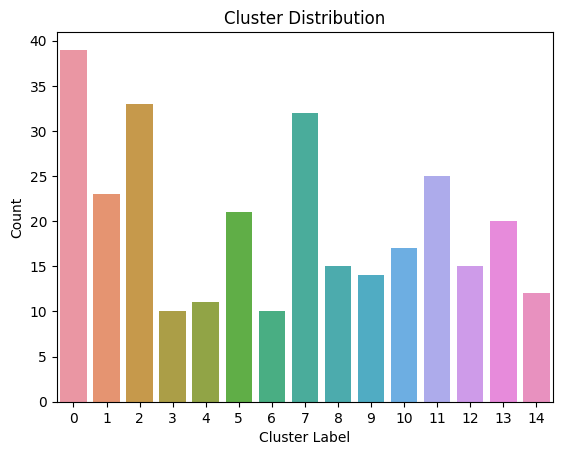

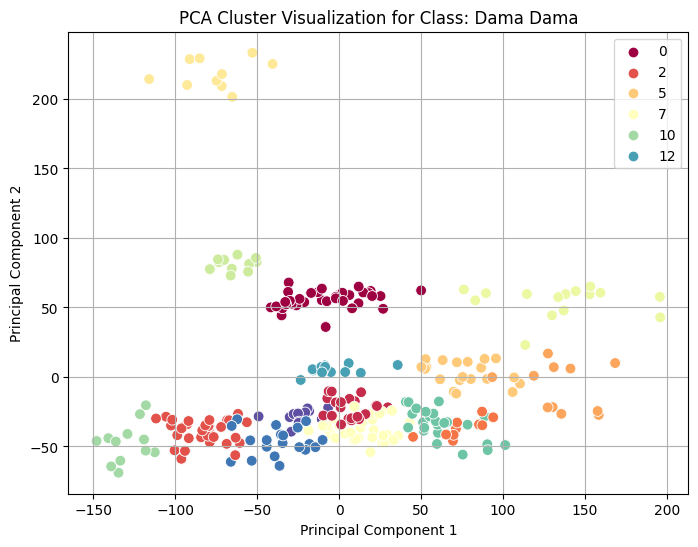

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1918
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1720
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1411
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py

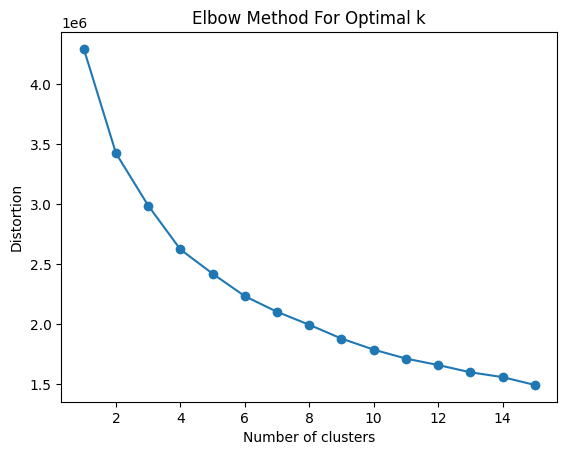

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Colluricincla Harmonica
Average distances to cluster centers: [63.03345, 60.7229, 52.74044, 67.75852, 54.187786, 62.09156, 58.66955, 60.30593, 54.213303, 40.922188, 63.185677, 64.87574, 52.24269, 52.96563, 65.83056]
Silhouette score: 0.2156490981578827


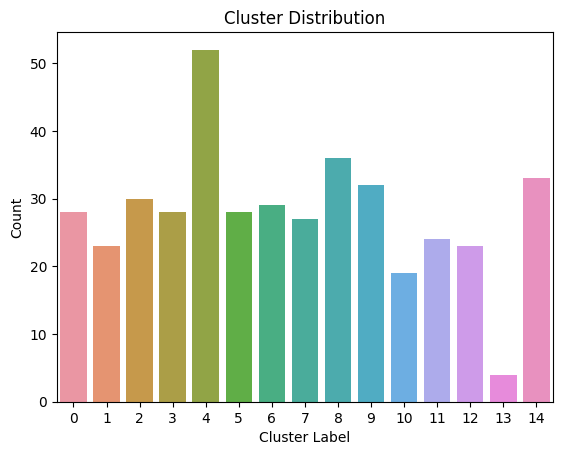

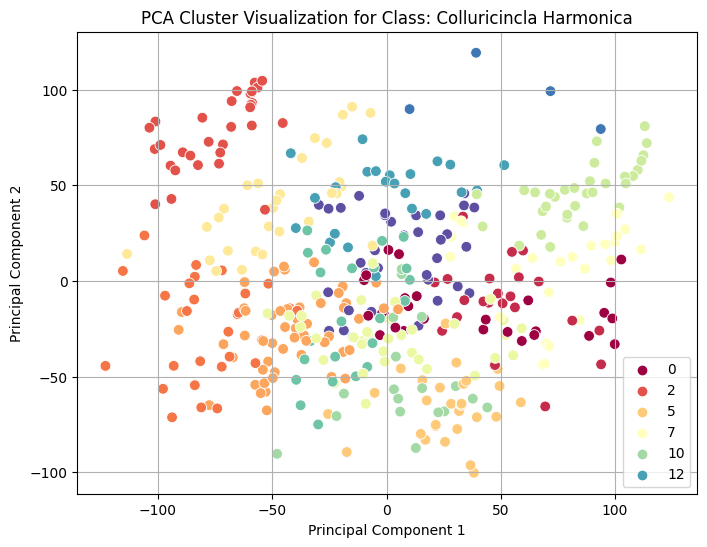

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1500
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1300
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warn

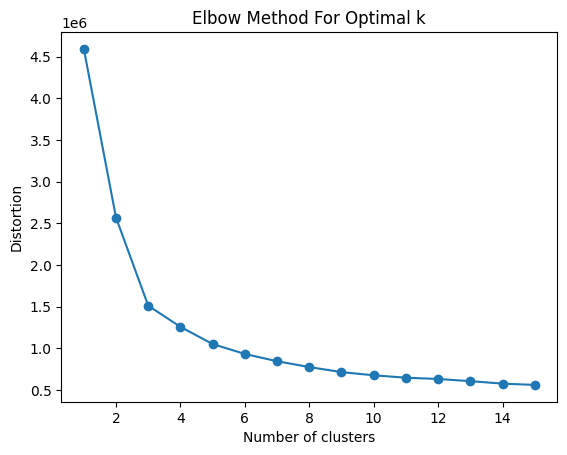

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Corvus Coronoides
Average distances to cluster centers: [32.344624, 44.22464, 41.751095, 38.75209, 40.20228, 46.30459, 38.758526, 33.662365, 39.030983, 36.15021, 37.001465, 45.952934, 48.31358, 70.08693, 49.488388]
Silhouette score: 0.25161290168762207


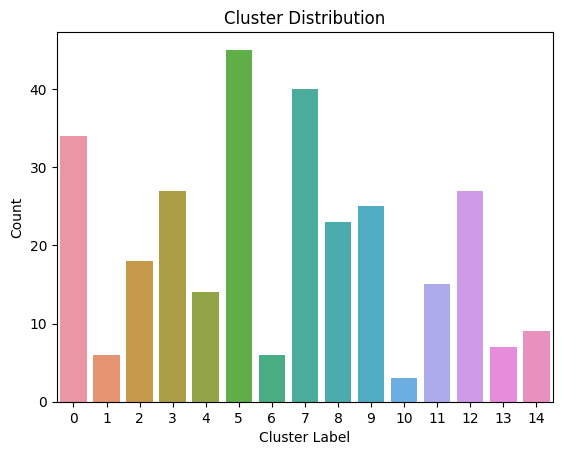

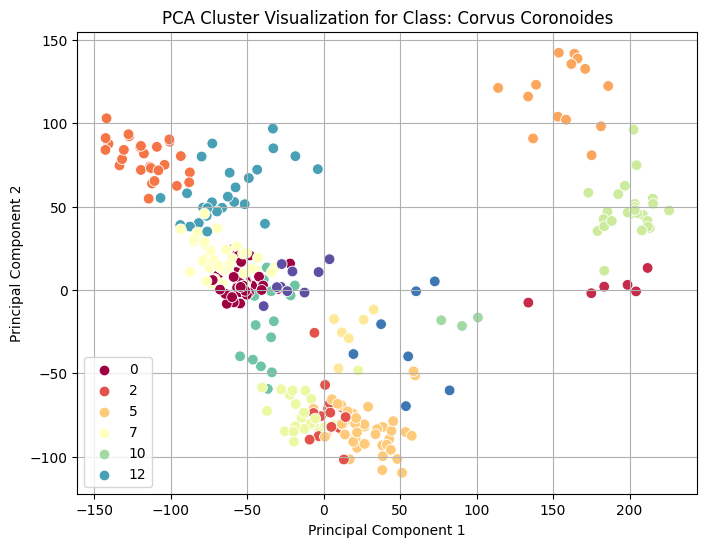

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1213
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1720
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py

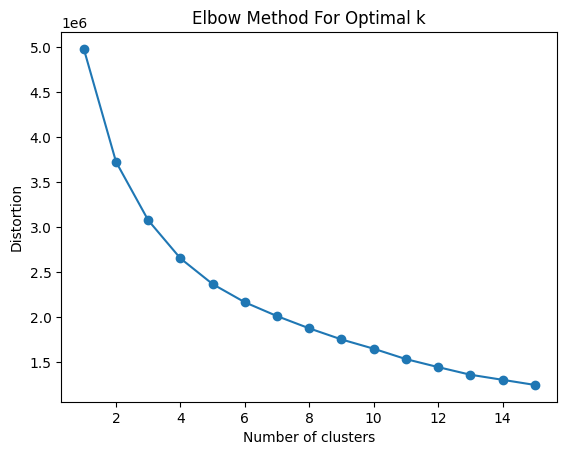

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Eopsaltria Australis
Average distances to cluster centers: [53.62908, 49.628105, 55.22432, 47.232487, 42.5103, 58.614357, 28.790083, 55.954746, 64.829544, 16.64936, 58.88127, 45.486816, 52.38021, 55.74036, 49.01023]
Silhouette score: 0.2640054523944855


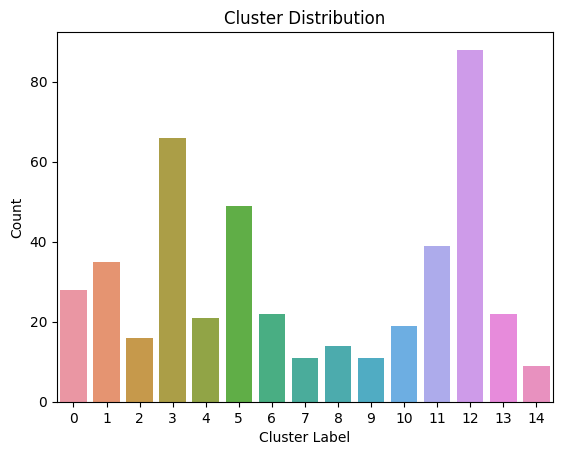

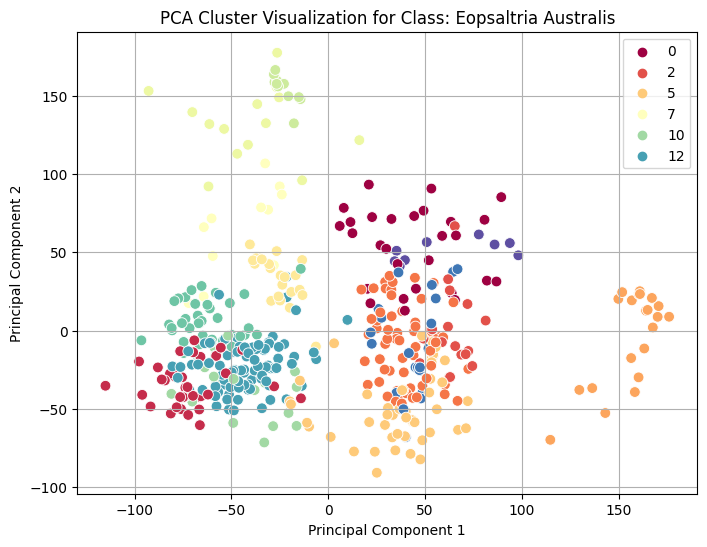

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1719
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2007
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1631
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py

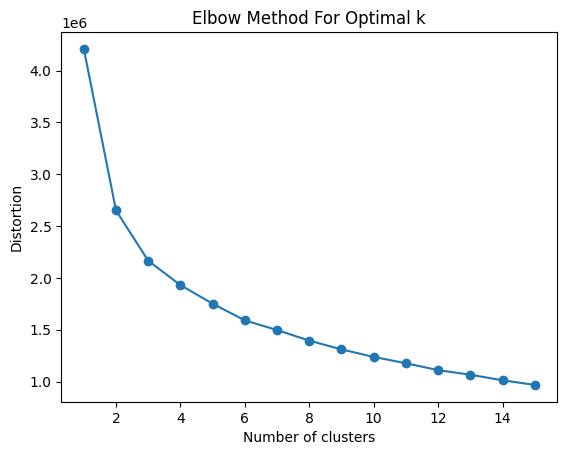

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Felis Catus
Average distances to cluster centers: [53.786224, 52.264214, 47.65236, 62.08568, 77.79015, 33.38153, 17.824337, 38.75154, 72.19774, 30.71461, 54.403896, 48.901527, 5.462856e-07, 63.346424, 55.939064]
Silhouette score: 0.21592992544174194


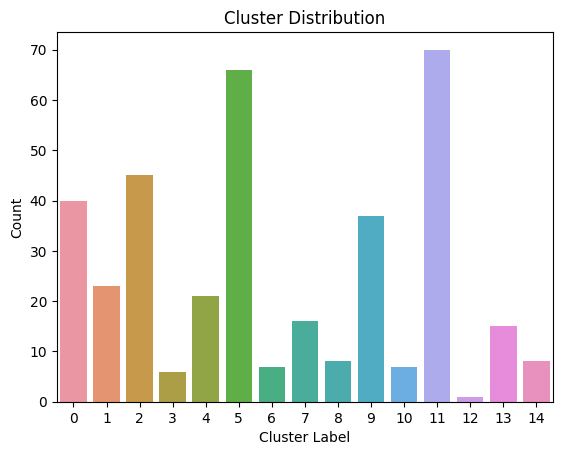

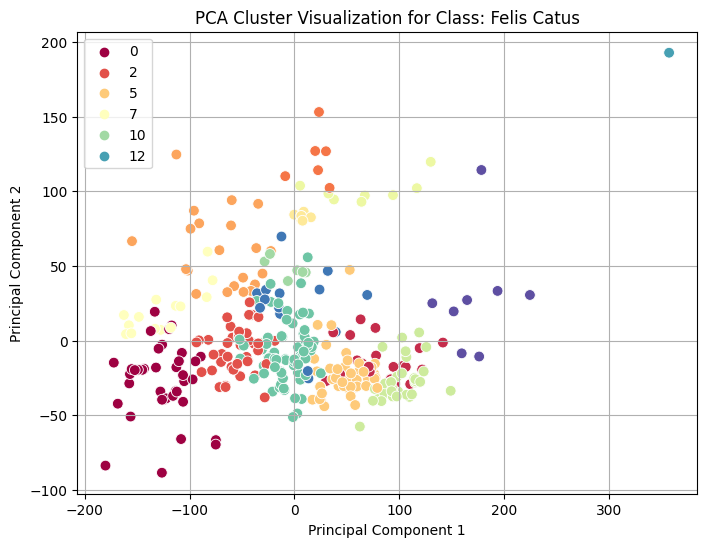

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1919
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1235
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2028
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1676
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'au

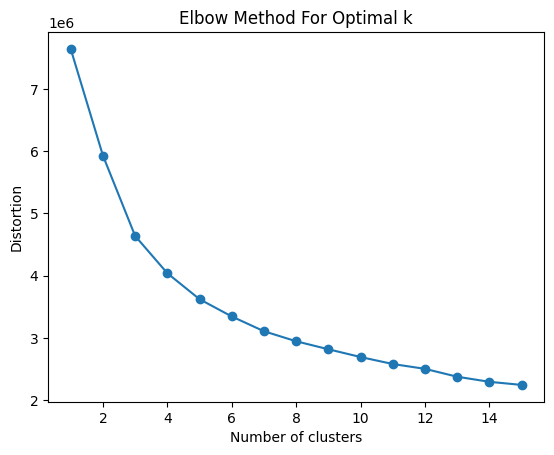

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Pachycephala Rufiventris
Average distances to cluster centers: [50.511814, 32.870052, 57.48572, 40.83793, 57.33381, 49.424374, 40.405285, 49.725456, 46.53334, 59.005928, 57.333836, 56.72085, 62.168667, 76.868095, 59.68828]
Silhouette score: 0.19554628431797028


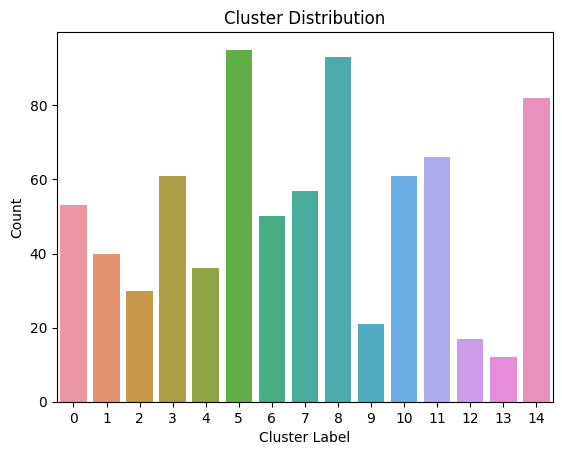

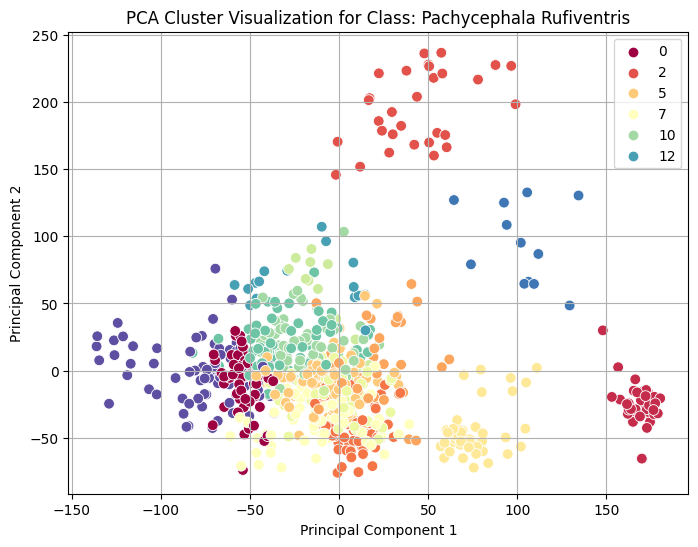

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2029
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warn

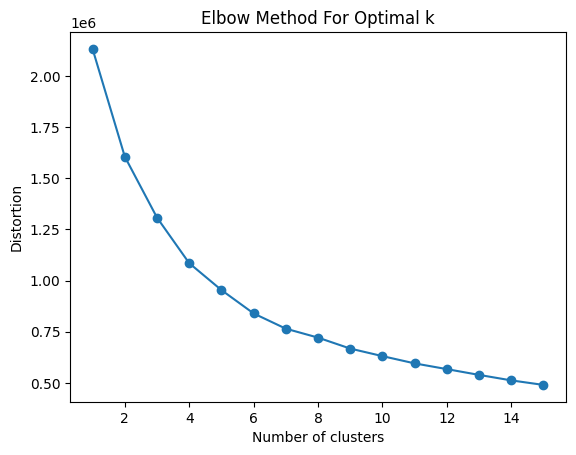

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Ptilotula Penicillata
Average distances to cluster centers: [57.963776, 45.258347, 28.523817, 44.186134, 34.981247, 36.91005, 38.851467, 40.973724, 33.124718, 37.37344, 44.3696, 51.132416, 48.278297, 64.55908, 51.65715]
Silhouette score: 0.2882895767688751


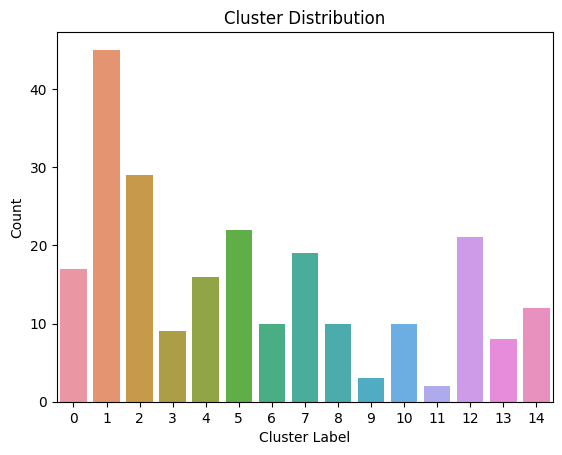

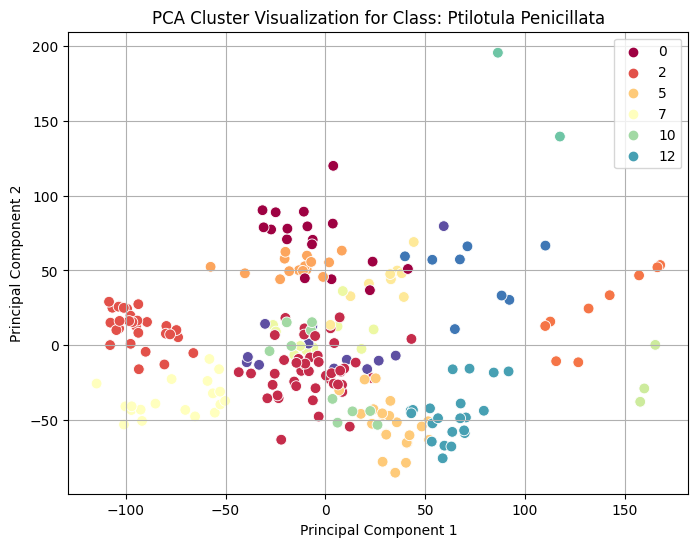

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1897
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

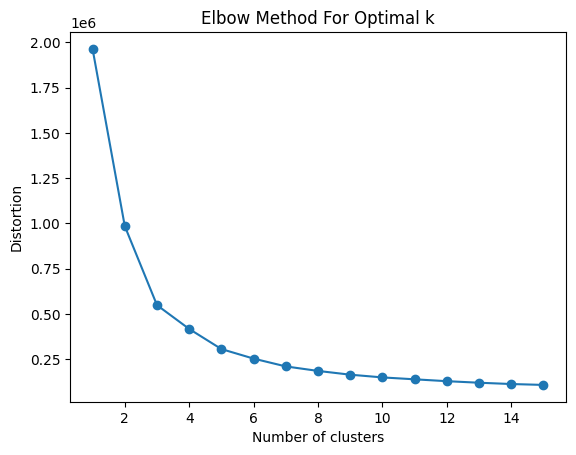

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Rattus Norvegicus
Average distances to cluster centers: [28.191898, 21.313026, 22.157654, 18.024364, 19.649181, 19.701338, 23.887169, 25.05967, 20.84651, 20.261627, 13.339731, 21.746496, 28.114962, 22.890892, 21.908764]
Silhouette score: 0.37021684646606445


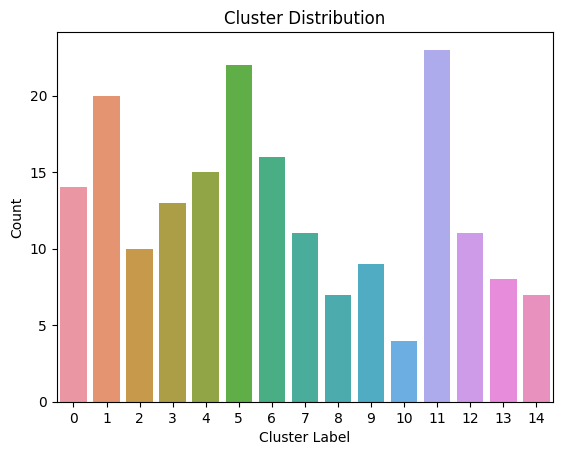

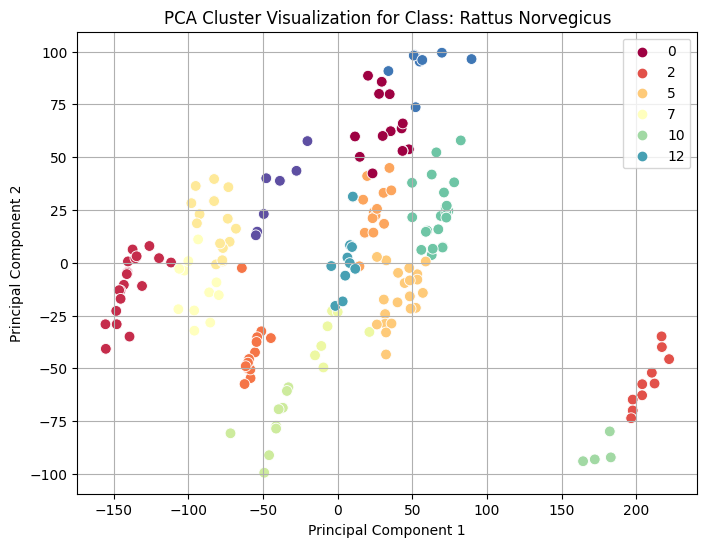

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1962
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2029
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1346
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1300
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1212
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  wa

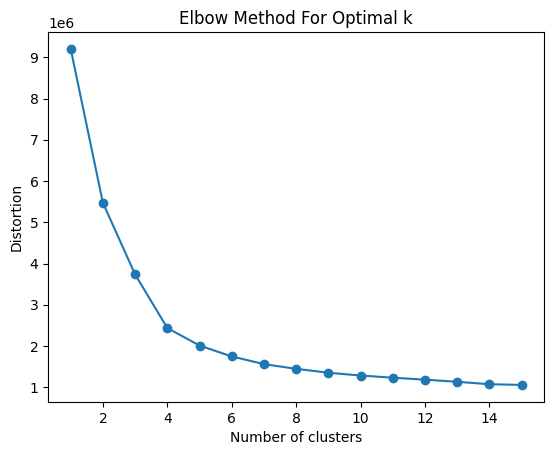

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Sus_Scrofa
Average distances to cluster centers: [32.975292, 35.39378, 36.42472, 21.509012, 50.875908, 24.480854, 41.390053, 36.60495, 32.681877, 47.753082, 38.661842, 30.608206, 35.90703, 35.95242, 39.194424]
Silhouette score: 0.2751341462135315


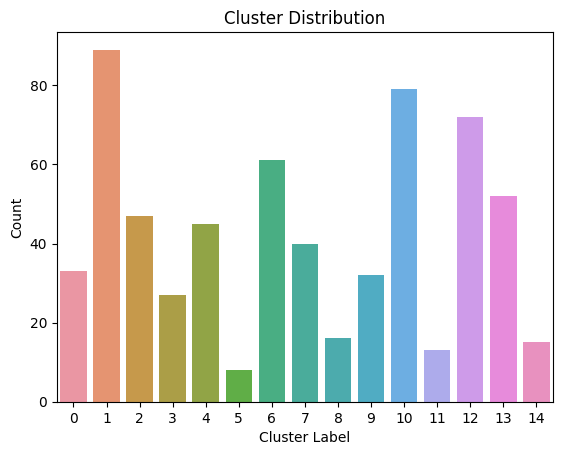

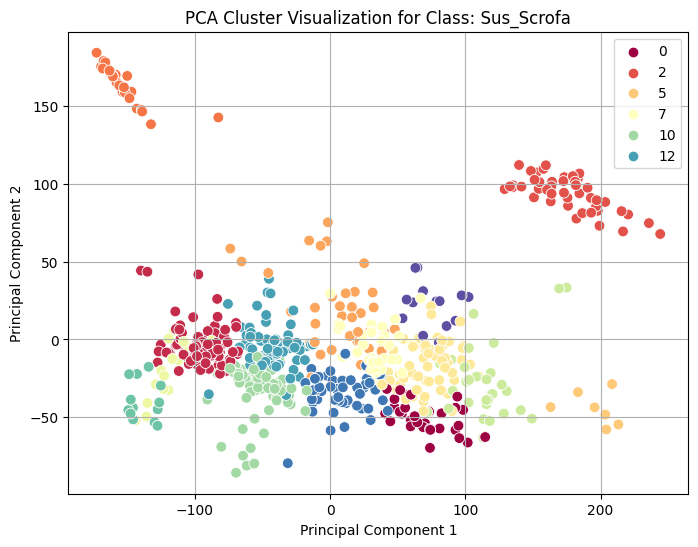

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1984
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1742
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1962
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py

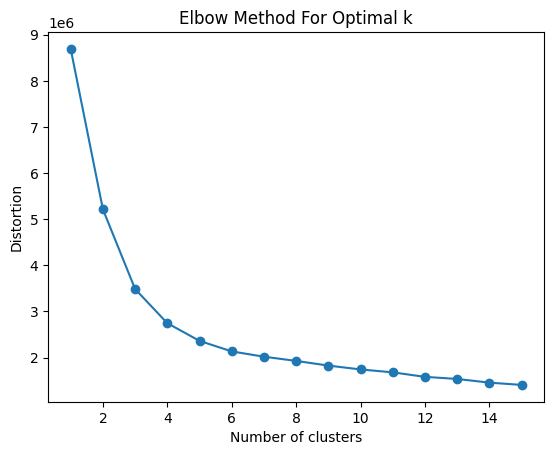

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: Strepera Graculina
Average distances to cluster centers: [50.222446, 54.085327, 56.60957, 34.474545, 46.15415, 59.969074, 52.15783, 41.08128, 44.879, 47.246017, 60.28977, 31.130634, 39.69634, 43.470425, 44.966194]
Silhouette score: 0.23193930089473724


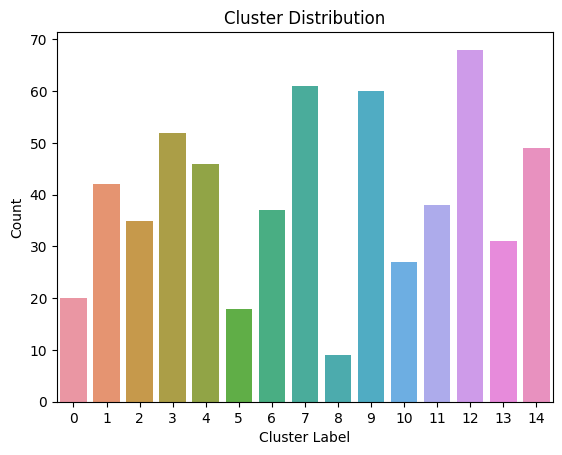

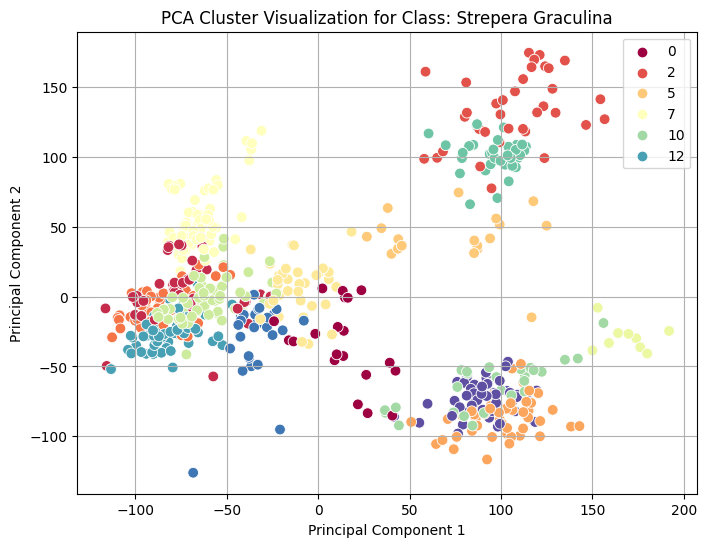

In [7]:



# Iterating over directories and processing audio files
for class_folder in os.listdir(main_folder_path):
    class_folder_path = os.path.join(main_folder_path, class_folder)

    # Ensure it is a folder
    if not os.path.isdir(class_folder_path):
        continue

    # Prepare output directories
    output_directory = os.path.join(cleaned_folder_path, class_folder, 'separated_sources')
    os.makedirs(output_directory, exist_ok=True)

    # Lists to store features and file paths for clustering
    features_list = []
    file_paths = []

    # Process each audio file in the class directory
    for audio_file in os.listdir(class_folder_path):
        audio_file_path = os.path.join(class_folder_path, audio_file)

        # Ensure it is a file
        if not os.path.isfile(audio_file_path):
            continue

        # Load the audio file
        sound = AudioSegment.from_file(audio_file_path)

        # Split the audio file on silence and save non-silent chunks
        chunks = split_on_silence(sound, min_silence_len=100, silence_thresh=-40)
        for i, chunk in enumerate(chunks):
            chunk_path = os.path.join(output_directory, f"{os.path.splitext(audio_file)[0]}_chunk{i}.wav")
            chunk.export(chunk_path, format="wav")

            # Extract features from the chunk and save the file path
            features = extract_features(chunk_path)
            features_list.append(features)
            file_paths.append(chunk_path)


    find_optimal_clusters(features_list, max_k=15)
    labels, cluster_centers = perform_clustering(features_list, n_clusters=15)

    avg_distances, sil_score = analyze_clusters(features_list, labels, cluster_centers)
    print(f"Class: {class_folder}")
    print(f"Average distances to cluster centers: {avg_distances}")
    print(f"Silhouette score: {sil_score}")

    plot_cluster_distribution(labels)
    visualize_clusters(np.vstack(features_list), labels, class_folder)
    save_results(labels, file_paths, os.path.join(cleaned_folder_path, class_folder))


# New section